In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("CC GENERAL.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
ortalama_minimum_payments = df["MINIMUM_PAYMENTS"].mean()
df["MINIMUM_PAYMENTS"].fillna(ortalama_minimum_payments, inplace=True)


df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [7]:
clustering_df = df[["BALANCE","PURCHASES","CREDIT_LIMIT"]]
scaler = MinMaxScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)
clustering_df_scaled_df = pd.DataFrame(clustering_df_scaled, columns=clustering_df.columns)

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(clustering_df)
df["CREDIT_CARD_SEGMENTS"] = clusters

In [8]:
df["CREDIT_CARD_SEGMENTS"] = df["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})

In [9]:
print(df["CREDIT_CARD_SEGMENTS"].head(15))

0     Cluster 3
1     Cluster 1
2     Cluster 1
3     Cluster 1
4     Cluster 3
5     Cluster 3
6     Cluster 2
7     Cluster 3
8     Cluster 1
9     Cluster 2
10    Cluster 3
11    Cluster 3
12    Cluster 3
13    Cluster 1
14    Cluster 3
Name: CREDIT_CARD_SEGMENTS, dtype: object


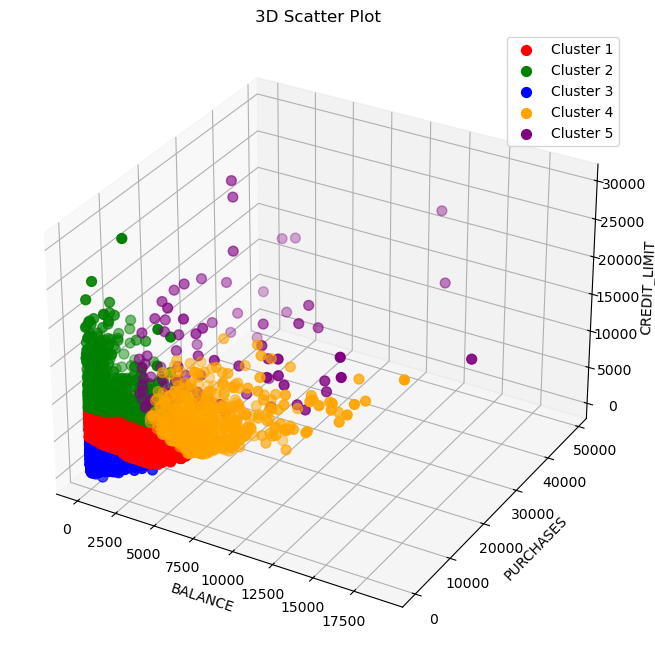

In [10]:
colors = {'Cluster 1': 'red', 'Cluster 2': 'green', 'Cluster 3': 'blue',
          'Cluster 4': 'orange', 'Cluster 5': 'purple'}


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for segment, color in colors.items():
    segment_df = df[df['CREDIT_CARD_SEGMENTS'] == segment]
    ax.scatter(segment_df['BALANCE'], segment_df['PURCHASES'], segment_df['CREDIT_LIMIT'],
               c=color, s=50, label=segment)


ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDIT_LIMIT')


plt.title('3D Scatter Plot')
ax.legend()

plt.show()
